#Hands-on Activity 11.2 Classification using Logistic Regression


**Name:** Xander Sam E. Galapia

**Section:** CPE22S3

In [257]:
pip install ucimlrepo

In [258]:
!pip install hvplot


In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [260]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [261]:
CC = pd.concat([X,y], axis = 1)
CC

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [262]:
CC.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [263]:
no_val = []
for x in CC.columns:
  if CC[x].isnull().any():
    no_val.append(x)
no_val

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis']

In [264]:
for x in no_val:
  CC[x].fillna(CC[x].mode()[0], inplace=True)

In [265]:
CC.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [266]:
CC.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.446278,0.686480,1.972394,0.096737,...,1.425408,1.398601,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,2.210351,0.464194,3.597888,0.295771,...,2.201550,2.113931,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
CC.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.365248,0.514977,0.057204,0.218261,0.131861,0.029201,0.298892,0.279429,...,0.089970,0.106811,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.147280,0.082388,0.236858,0.175729,0.174968,0.004027,0.021525,0.032460,...,0.055506,0.061756,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.365248,-0.147280,1.000000,-0.046099,-0.123017,-0.058620,-0.057013,-0.009563,0.031976,-0.008826,...,0.012439,0.018384,0.067996,-0.031960,0.044727,0.036664,-0.015311,0.005275,-0.009594,0.008771
Num of pregnancies,0.514977,0.082388,-0.046099,1.000000,0.077363,0.172084,0.092214,0.116944,0.221456,0.198134,...,0.073091,0.084750,0.042765,-0.037752,0.054111,-0.003034,0.033987,0.077526,-0.020131,0.027959
Smokes,0.057204,0.236858,-0.123017,0.077363,1.000000,0.723572,0.493843,0.004036,0.040917,-0.055115,...,0.084156,0.092835,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.218261,0.175729,-0.058620,0.172084,0.723572,1.000000,0.724320,-0.013888,0.052436,0.027492,...,0.097131,0.104913,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174968,-0.057013,0.092214,0.493843,0.724320,1.000000,0.001713,0.043803,0.008226,...,0.051371,0.056064,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.029201,0.004027,-0.009563,0.116944,0.004036,-0.013888,0.001713,1.000000,0.370696,0.000188,...,-0.020056,-0.005680,0.011278,-0.004397,0.028808,-0.007245,0.012360,-0.034002,-0.025116,-0.018015
Hormonal Contraceptives (years),0.298892,0.021525,0.031976,0.221456,0.040917,0.052436,0.043803,0.370696,1.000000,0.115456,...,0.042351,0.050606,0.064993,0.003972,0.066509,-0.008054,0.054264,0.101250,0.084429,0.097937
IUD,0.279429,0.032460,-0.008826,0.198134,-0.055115,0.027492,0.008226,0.000188,0.115456,1.000000,...,0.072918,0.080093,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


In [268]:
CC = CC.drop(['STDs:AIDS',
              'STDs:cervical condylomatosis'], axis = 1)

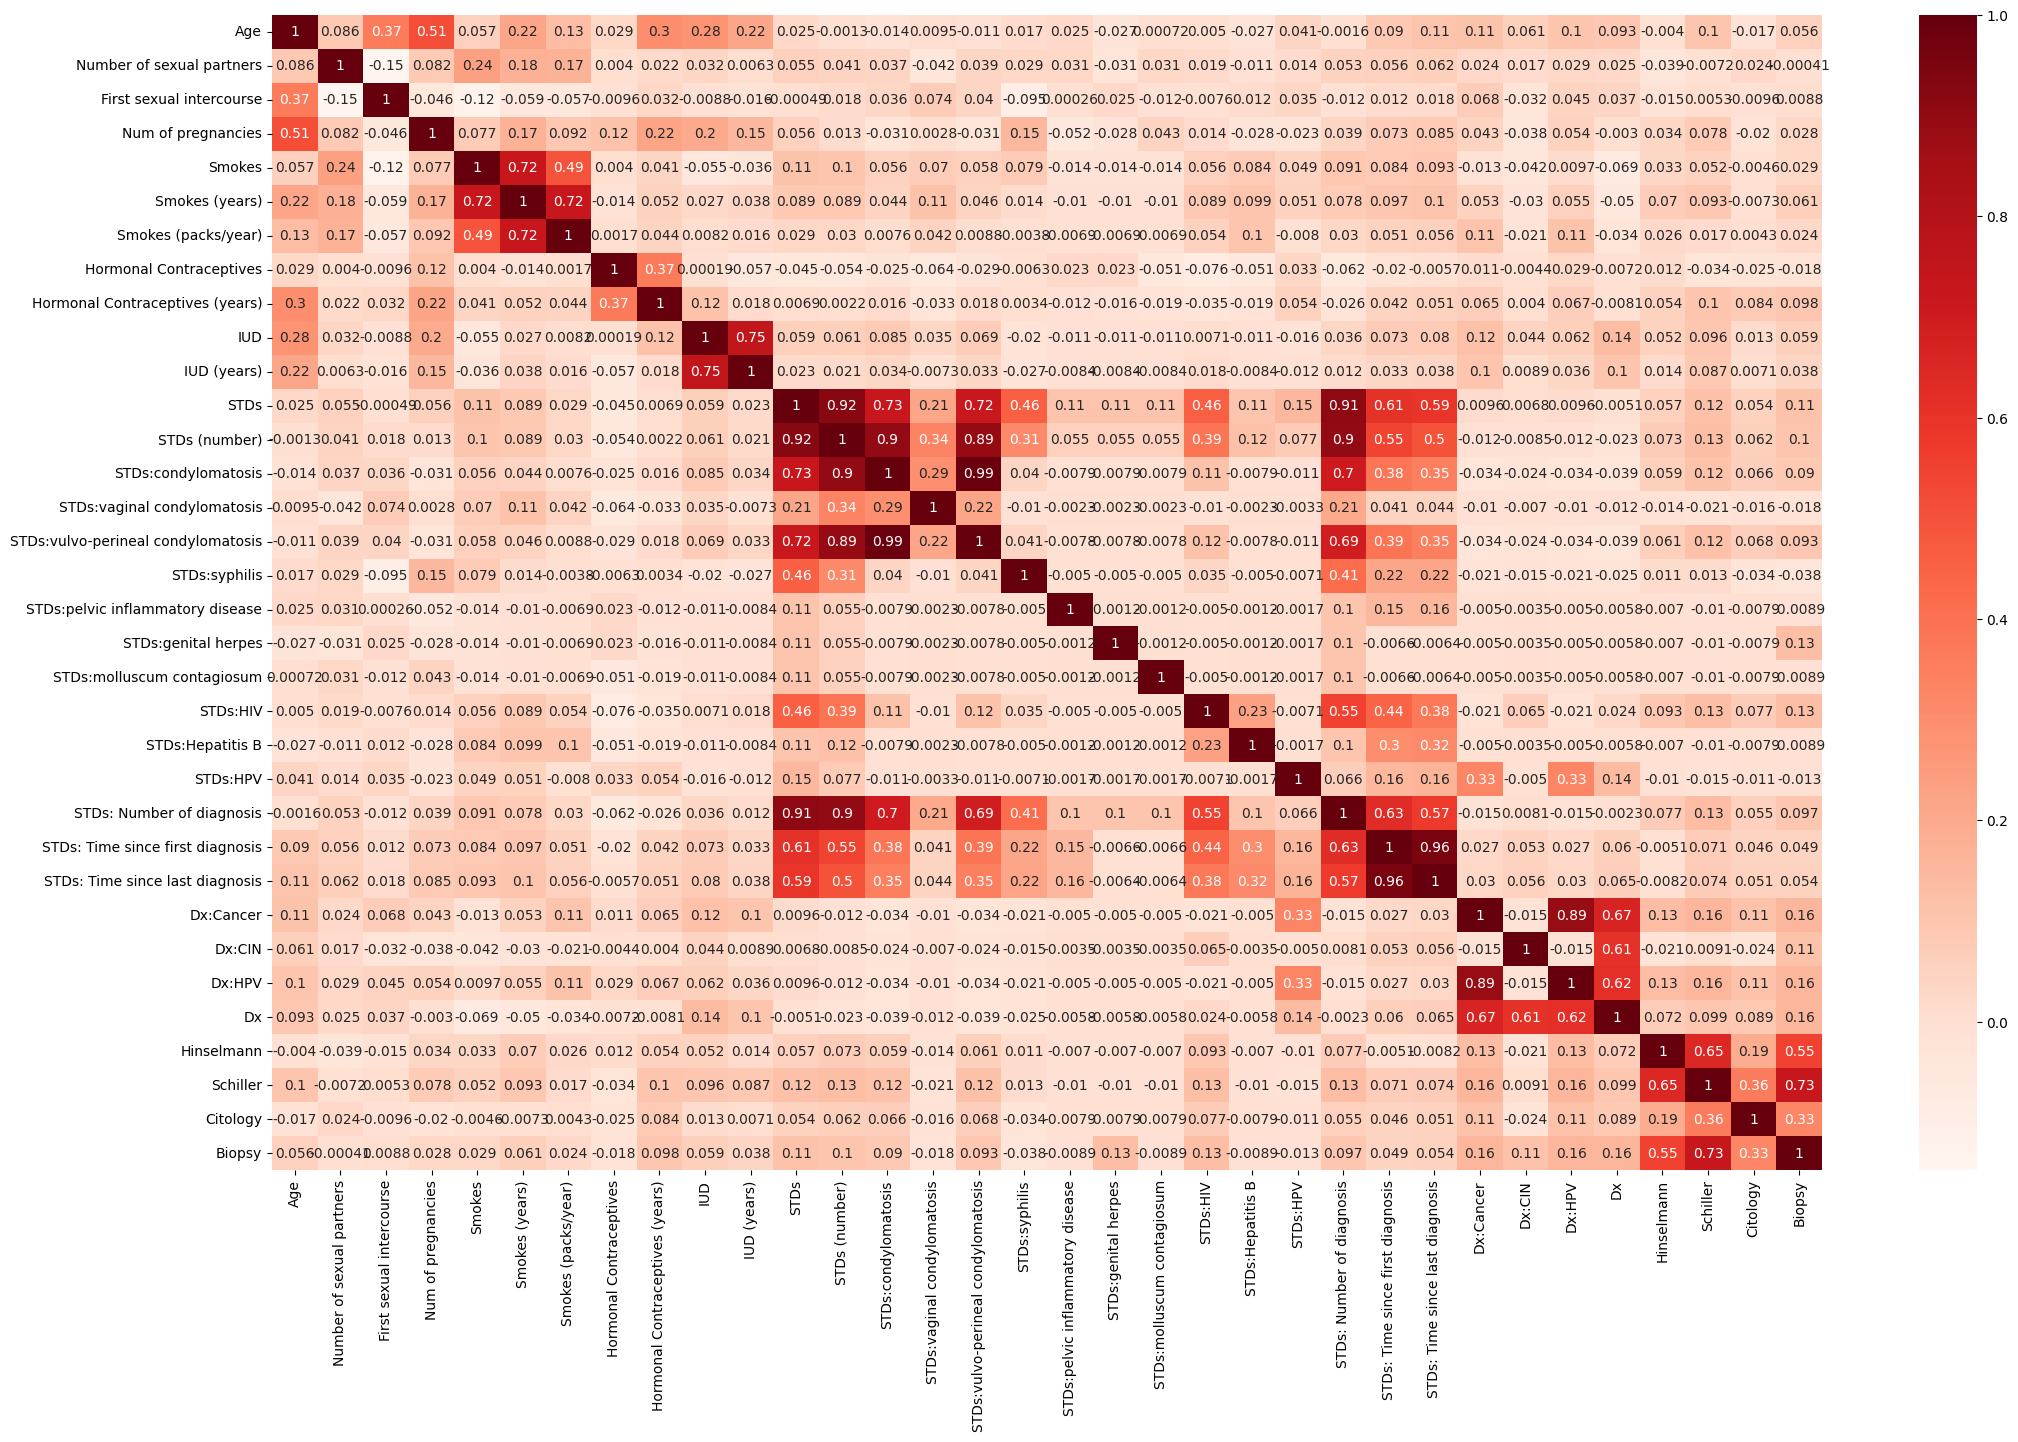

In [269]:
plt.figure(figsize =(25,15))
ax = sns.heatmap(CC.corr(), annot = True, cmap = 'Reds')

In [270]:
CC.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:HIV                              float64
STDs:Hepatitis B                  

In [271]:
CC.head(30)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,1.0,1.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,1.0,1.0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,1.0,1.0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,1.0,1.0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,1.0,1.0,1.266973,2.80,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


<Axes: xlabel='STDs', ylabel='STDs (number)'>

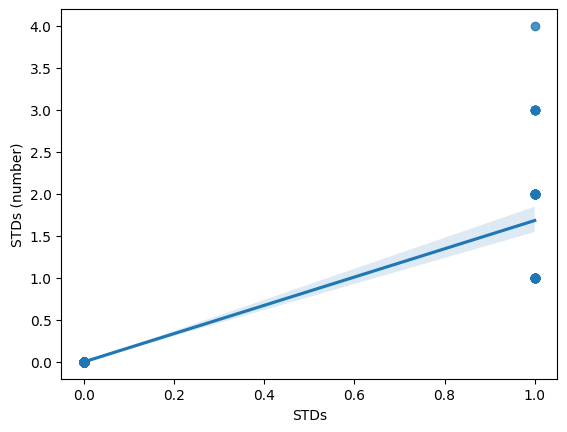

In [272]:
sns.regplot(x = CC['STDs'], y = CC['STDs (number)'])

In [273]:
CC.corr()

AX = CC.drop('Dx:Cancer', axis = 1)
AY = CC['Number of sexual partners']

print("X = ",AX.shape, "\nY = ", AY.shape)


X =  (858, 33) 
Y =  (858,)


In [274]:
AX_train, AX_test, AY_train, AY_test = train_test_split(AX, AY, test_size = 0.3, random_state = 101)

In [275]:
AX_train.shape


(600, 33)

In [276]:
AY_train.shape

(600,)

In [277]:
model1 = LinearRegression()

In [278]:
model1.fit(AX_train, AY_train)

LinearRegression()

In [279]:
model1.coef_


array([ 3.33080316e-16,  1.00000000e+00, -2.88423056e-16, -4.00164546e-16,
       -4.64422615e-15,  3.05222863e-16, -2.77110936e-16,  1.09266336e-15,
       -4.14819107e-17, -5.13183030e-15,  5.95855059e-16,  2.63540623e-15,
       -6.75706770e-15,  5.10884151e-15, -5.62762244e-15,  3.30942626e-15,
       -2.20432056e-15,  3.46944695e-18, -1.88096556e-15, -1.73472348e-18,
        1.35785772e-15, -1.22743345e-14,  5.33725057e-15,  4.18966208e-15,
       -1.40958362e-16,  2.65004674e-16,  7.93483498e-15,  1.83527187e-15,
       -6.24551880e-15,  8.53607961e-16,  9.09769183e-15,  5.06142163e-15,
       -1.17494850e-14])

In [280]:
pd.DataFrame(model1.coef_, AX.columns, columns = ['Coedicients'])


,Coedicients
Age,3.330803e-16
Number of sexual partners,1.000000e+00
First sexual intercourse,-2.884231e-16
Num of pregnancies,-4.001645e-16
Smokes,-4.644226e-15
Smokes (years),3.052229e-16
Smokes (packs/year),-2.771109e-16
Hormonal Contraceptives,1.092663e-15
Hormonal Contraceptives (years),-4.148191e-17
IUD,-5.131830e-15


In [281]:
AY_pred = model1.predict(AX_test)


In [282]:
MAE = metrics.mean_absolute_error(AY_test, AY_pred)
MSE = metrics.mean_squared_error(AY_test, AY_pred)
RMSE = np.sqrt(MSE)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MAE:  2.6503347320412168e-15
MSE:  1.4147373762025927e-29
RMSE:  3.7612994778435185e-15


In [283]:
CC['Dx:Cancer'].mean()


0.02097902097902098

In [284]:
test_residual = AY_test - AY_pred


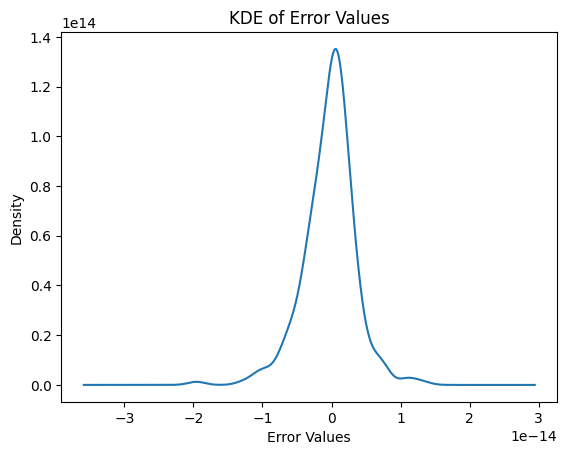

In [285]:
test_residual.plot(kind='kde')
plt.xlabel('Error Values')
plt.ylabel('Density')
plt.title('KDE of Error Values')
plt.show()


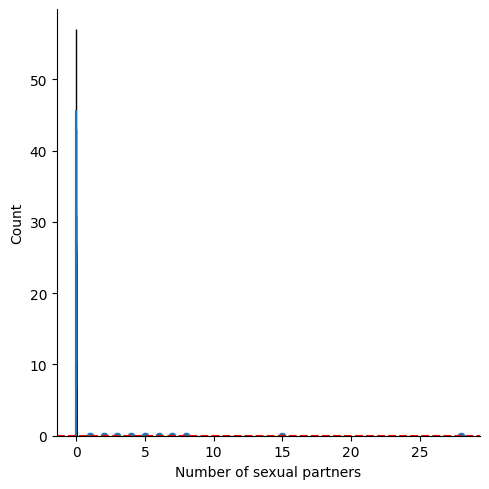

In [286]:
sns.displot(test_residual, bins = 25, kde = True)

sns.scatterplot(x = AY_test, y=test_residual)
plt.axhline(y=0, color='red', ls='--')

#Logistic regression

In [287]:
XCan = CC.drop(columns = 'Dx:Cancer')


In [288]:
YCan = CC['Dx:Cancer']

In [289]:
XCan_train, XCan_test, YCan_train, YCan_test = train_test_split(XCan, YCan, test_size = 0.3, random_state = 101)

In [290]:
from sklearn.preprocessing import StandardScaler

In [291]:
scaler = StandardScaler()

In [292]:
XCan_train_scaled = scaler.fit_transform(XCan_train)

In [293]:
XCan_test_scaled = scaler.transform(XCan_test)

In [294]:
XCan_train_scaled

array([[ 1.14018916,  2.58717906,  3.54934575, ..., -0.30151134,
        -0.23735633, -0.25635788],
       [ 0.23572577, -1.08605198,  0.82506721, ..., -0.30151134,
        -0.23735633, -0.25635788],
       [-1.23402724, -1.08605198, -1.12084603, ...,  3.31662479,
        -0.23735633, -0.25635788],
       ...,
       [ 0.91407331,  0.38324044,  0.43588457, ..., -0.30151134,
        -0.23735633, -0.25635788],
       [ 2.38382633, -0.35140577, -0.34248073, ..., -0.30151134,
        -0.23735633, -0.25635788],
       [ 0.57489954,  1.11788665,  0.04670192, ..., -0.30151134,
        -0.23735633, -0.25635788]])

In [295]:
XCan_test_scaled

array([[ 0.3487837 , -0.35140577,  4.7168937 , ..., -0.30151134,
        -0.23735633, -0.25635788],
       [-0.89485347, -0.35140577, -0.73166338, ..., -0.30151134,
        -0.23735633, -0.25635788],
       [-1.23402724, -0.35140577, -0.73166338, ..., -0.30151134,
         4.21307489, -0.25635788],
       ...,
       [ 0.12266785,  0.38324044,  1.60343251, ..., -0.30151134,
        -0.23735633, -0.25635788],
       [-0.66873762, -0.35140577,  0.82506721, ..., -0.30151134,
        -0.23735633, -0.25635788],
       [ 0.00960992,  1.85253285,  0.82506721, ..., -0.30151134,
         4.21307489, -0.25635788]])

In [296]:
from sklearn.linear_model import LogisticRegression

In [297]:
from sklearn.metrics import accuracy_score


In [298]:
log_reg = LogisticRegression(random_state = 0).fit(XCan_train_scaled, YCan_train)

In [299]:
log_reg.predict(XCan_train_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [300]:
log_reg.score(XCan_train_scaled, YCan_train)

1.0

In [301]:
log_reg.score(XCan_test_scaled, YCan_test)

0.9844961240310077

In [302]:
Xhp = CC.drop(columns = 'Dx:HPV')
Yhp = CC['Dx:HPV']

In [303]:
Xhp_train, Xhp_test, Yhp_train, Yhp_test = train_test_split(Xhp, Yhp, test_size = 0.3, random_state = 96)

In [304]:
Xhp_train_scaled = scaler.fit_transform(Xhp_train)
Xhp_test_scaled = scaler.transform(Xhp_test)

In [305]:
log_reg = LogisticRegression(random_state = 0).fit(Xhp_train_scaled, Yhp_train)

In [306]:
log_reg.predict(Xhp_train_scaled)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [307]:
log_reg.score(Xhp_train_scaled, Yhp_train)

0.9983333333333333

In [308]:
log_reg.score(Xhp_test_scaled, Yhp_test)

0.9883720930232558

In [309]:
XCC = CC.drop(columns = 'Dx:Cancer')
YNsp = CC['Number of sexual partners']

In [310]:
XCC_train, XCC_test, YNsp_train, YNsp_test = train_test_split(XCC, YNsp, test_size = 0.3, random_state = 96)

XCC_train_scaled = scaler.fit_transform(XCC_train)
XCC_test_scaled = scaler.transform(XCC_test)

In [311]:
log_reg = LogisticRegression(random_state = 0).fit(XCC_train_scaled, YNsp_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [312]:
log_reg.predict(XCC_train_scaled)

array([ 2.,  1.,  3.,  3.,  2.,  4.,  1.,  3.,  3.,  2.,  2.,  4.,  2.,
        2.,  1.,  3.,  2.,  2.,  1.,  3.,  2.,  1.,  2.,  4.,  1.,  2.,
        1.,  2.,  2.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,  2.,  3.,  2.,
        3.,  2.,  1.,  2.,  1.,  1.,  2.,  2.,  2.,  3.,  2.,  5.,  1.,
        1.,  2.,  5.,  2.,  4.,  3.,  2.,  1.,  2.,  2.,  4.,  5.,  2.,
        1.,  2.,  3.,  3.,  1.,  3.,  1.,  2.,  4.,  1.,  2.,  2.,  1.,
        2.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,  3.,  1.,  5.,  4.,  3.,
        4.,  1.,  3.,  4.,  1.,  3.,  3.,  3.,  2.,  4.,  3.,  2.,  2.,
        2.,  2.,  2.,  4.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,
        2.,  2.,  2.,  1.,  1.,  3.,  3.,  1.,  1.,  1.,  1.,  3.,  2.,
        4.,  2.,  1.,  1.,  3.,  3.,  1.,  3.,  2.,  1.,  2.,  2.,  2.,
        3.,  2.,  5.,  1.,  1.,  1.,  3.,  3.,  3.,  1.,  1.,  3.,  4.,
        2.,  2.,  4.,  3.,  2.,  1.,  3.,  1.,  2.,  3.,  2.,  2.,  3.,
        1.,  3.,  2.,  3.,  1.,  5.,  2.,  2.,  4.,  3.,  2.,  3

In [313]:
log_reg.score(XCC_train_scaled, YNsp_train)

0.9233333333333333

In [314]:
log_reg.score(XCC_test_scaled, YNsp_test)

0.8643410852713178